In [51]:
from kloppy import sportec

#event_dataset = sportec.load_open_event_data(match_id="J03WN1")
#events = impect.load_open_data(match_id=122840)

In [8]:
# gets specific event (in this case, goal)
goal_event = event_dataset.get_event_by_id("18226900000272")
print(goal_event)
print(goal_event.player)

<ShotEvent event_id='18226900000272' time='P1T18:04' team='VfL Bochum 1848' player='P. Förster' result='GOAL'>
P. Förster


In [11]:
# uses prev/next to move to forwards/backwards from plays (can also distingush action type as seem below)
assist_event = goal_event.prev("pass.complete")
print(assist_event)

post_goal_event = goal_event.next()
print(post_goal_event)

next_shot_event = goal_event.next("shot")
print(next_shot_event)

<PassEvent event_id='18226900000271' time='P1T18:00' team='VfL Bochum 1848' player='T. Asano' result='COMPLETE'>
<PassEvent event_id='18226900000273' time='P1T19:13' team='Bayer 04 Leverkusen' player='S. Azmoun' result='COMPLETE'>
<ShotEvent event_id='18226900000281' time='P1T19:33' team='VfL Bochum 1848' player='A. Losilla' result='OFF_TARGET'>


In [13]:
# iterating within data structures
shot_events = event_dataset.find_all("shot")
goal_events = event_dataset.find_all("shot.goal")
print(shot_events[0])
print(shot_events[0].qualifiers)
print(shot_events[0].qualifiers[0].value)

<ShotEvent event_id='18226900000020' time='P1T00:52' team='Bayer 04 Leverkusen' player='S. Azmoun' result='BLOCKED'>
[BodyPartQualifier(value=<BodyPart.RIGHT_FOOT: 'RIGHT_FOOT'>)]
BodyPart.RIGHT_FOOT


Text(0.5, 0.5, 'P1T18:04 - Goal by P. Förster (VfL Bochum 1848)')

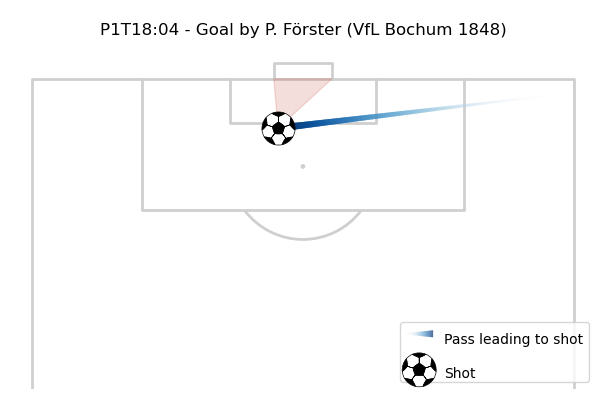

In [17]:
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from kloppy.domain import PositionType

# Setup the pitch
pitch = VerticalPitch(
    half=True, goal_type='box', pad_bottom=-.2,
    line_color="#cfcfcf",
    line_zorder=1,
    pitch_type="metricasports",
    pitch_length=event_dataset.metadata.pitch_dimensions.pitch_length,
    pitch_width=event_dataset.metadata.pitch_dimensions.pitch_width,
)

# We will use mplsoccer's grid function to plot a pitch with a title axis.
fig, axs = pitch.grid(
    figheight=4, endnote_height=0,  # no endnote
    title_height=0.1, title_space=0.02,
    # Turn off the endnote/title axis. I usually do this after
    # I am happy with the chart layout and text placement
    axis=False,
    grid_height=0.83
)

# Plot the goal angle
pitch.goal_angle(
    1-assist_event.receiver_coordinates.x, 1-assist_event.receiver_coordinates.y,
    alpha=0.2, zorder=1.1, color='#cb5a4c', goal='right', ax=axs['pitch']
)
# Plot the assist
pitch.lines(
    1-assist_event.coordinates.x, 1-assist_event.coordinates.y,
    1-assist_event.receiver_coordinates.x, 1-assist_event.receiver_coordinates.y,
    lw=5, transparent=True, comet=True, cmap='Blues', zorder=1.2,
    label='Pass leading to shot', ax=axs['pitch']
)
# Plot the shot
pitch.scatter(
    1-assist_event.receiver_coordinates.x, 1-assist_event.receiver_coordinates.y,
    s=600, marker="football", zorder=1.3, label='Shot', ax=axs['pitch']
)

# Add a legend and title
legend = axs['pitch'].legend(loc='lower right', labelspacing=1.5)
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_va('center')

# Add a title
axs['title'].text(
    0.5, 0.5,
    f'{goal_event.time} - Goal by {goal_event.player} ({goal_event.team})',
    va='center', ha='center', color='black', fontsize=12
)

In [20]:

tracking_dataset = sportec.load_open_tracking_data(
    match_id="J03WN1",
    limit=30000  # optional: for efficiency, we only load the first 30 000 frames
)

In [24]:
first_frame = tracking_dataset[0]
print(first_frame)

<Frame frame_id='10000' time='P1T00:00'>


In [26]:
print(f"Ball coordinates: (x={first_frame.ball_coordinates.x:.2f}, y={first_frame.ball_coordinates.y:.2f})")
for player, coordinates in first_frame.players_coordinates.items():
    print(f"{player} ({player.team}): (x={coordinates.x:.2f}, y={coordinates.y:.2f})")

Ball coordinates: (x=0.51, y=0.51)
Manuel Riemann (VfL Bochum 1848): (x=0.75, y=0.58)
K. Stöger (VfL Bochum 1848): (x=0.50, y=0.51)
P. Hofmann (VfL Bochum 1848): (x=0.50, y=0.80)
D. Heintz (VfL Bochum 1848): (x=0.62, y=0.63)
A. Losilla (VfL Bochum 1848): (x=0.57, y=0.62)
I. Ordets (VfL Bochum 1848): (x=0.50, y=0.86)
S. Janko (VfL Bochum 1848): (x=0.59, y=0.47)
T. Asano (VfL Bochum 1848): (x=0.50, y=0.36)
P. Förster (VfL Bochum 1848): (x=0.50, y=0.54)
C. Antwi-Adjei (VfL Bochum 1848): (x=0.49, y=0.63)
E. Mašović (VfL Bochum 1848): (x=0.49, y=0.74)
L. Hrádecký (Bayer 04 Leverkusen): (x=0.03, y=0.50)
Jonathan Tah (Bayer 04 Leverkusen): (x=0.32, y=0.75)
S. Azmoun (Bayer 04 Leverkusen): (x=0.42, y=0.74)
N. Amiri (Bayer 04 Leverkusen): (x=0.37, y=0.55)
M. Diaby (Bayer 04 Leverkusen): (x=0.50, y=0.37)
M. Bakker (Bayer 04 Leverkusen): (x=0.34, y=0.40)
Edmond Tapsoba (Bayer 04 Leverkusen): (x=0.32, y=0.61)
Exequiel Palacios (Bayer 04 Leverkusen): (x=0.37, y=0.65)
Jeremie Frimpong (Bayer 04 Leve

In [30]:
# Match the goal event with its corresponding tracking frame
matched_frame_idx = goal_event.raw_event["CalculatedFrame"]
goal_frame = tracking_dataset.get_record_by_id(int(matched_frame_idx))


Text(0.5, 0.5, 'P1T18:04 - Goal by P. Förster (VfL Bochum 1848)')

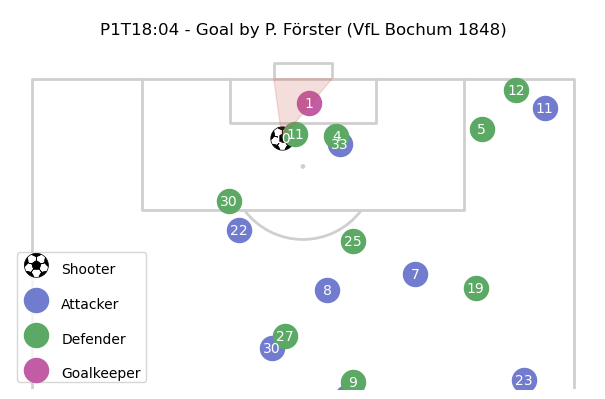

In [32]:
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from kloppy.domain import PositionType

# Setup the pitch
pitch = VerticalPitch(
    half=True, goal_type='box', pad_bottom=-0.2,
    line_color="#cfcfcf",
    line_zorder=1,
    pitch_type="metricasports",
    pitch_length=event_dataset.metadata.pitch_dimensions.pitch_length,
    pitch_width=event_dataset.metadata.pitch_dimensions.pitch_width,
)

# We will use mplsoccer's grid function to plot a pitch with a title axis.
fig, axs = pitch.grid(
    figheight=4, endnote_height=0,  # no endnote
    title_height=0.1, title_space=0.02,
    # Turn off the endnote/title axis. I usually do this after
    # I am happy with the chart layout and text placement
    axis=False,
    grid_height=0.83
)

# Plot the players
goal_scorer = goal_event.player
coordinates = {
  "shooter": {"x": [], "y": []},
  "attacker": {"x": [], "y": []},
  "defender": {"x": [], "y": []},
  "goalkeeper": {"x": [], "y": []},
}
for player, player_coordinates in goal_frame.players_coordinates.items():
    if player == goal_scorer:
        coordinates["shooter"]["x"].append(1-player_coordinates.x)
        coordinates["shooter"]["y"].append(1-player_coordinates.y)
    elif player.starting_position == PositionType.Goalkeeper:
        coordinates["goalkeeper"]["x"].append(1-player_coordinates.x)
        coordinates["goalkeeper"]["y"].append(1-player_coordinates.y)
    elif player.team == goal_scorer.team:
        coordinates["attacker"]["x"].append(1-player_coordinates.x)
        coordinates["attacker"]["y"].append(1-player_coordinates.y)
    else:
        coordinates["defender"]["x"].append(1-player_coordinates.x)
        coordinates["defender"]["y"].append(1-player_coordinates.y)

    # plot the jersey numbers
    pitch.annotate(
        player.jersey_no, (1-player_coordinates.x, 1-player_coordinates.y),
        va='center', ha='center', color='white',
        fontsize=10, ax=axs['pitch']
    )

# Plot the angle to the goal
pitch.goal_angle(coordinates["shooter"]["x"], coordinates["shooter"]["y"] , alpha=0.2, zorder=1.1, color='#cb5a4c', goal='right', ax=axs['pitch'])

# Plot the player coordinates
pitch.scatter(coordinates["shooter"]["x"], coordinates["shooter"]["y"], s=300, marker="football", label='Shooter', ax=axs['pitch'])
pitch.scatter(coordinates["attacker"]["x"], coordinates["attacker"]["y"], s=300, c='#727cce', label='Attacker', ax=axs['pitch'])
pitch.scatter(coordinates["defender"]["x"], coordinates["defender"]["y"], s=300, c='#5ba965', label='Defender', ax=axs['pitch'])
pitch.scatter(coordinates["goalkeeper"]["x"], coordinates["goalkeeper"]["y"], s=300, c='#c15ca5', label='Goalkeeper', ax=axs['pitch'])

# Add a legend
legend = axs['pitch'].legend(loc='lower left', labelspacing=1.5)
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_va('center')

# Add a title
axs['title'].text(
    0.5, 0.5,
    f'{goal_event.time} - Goal by {goal_event.player} ({goal_event.team})',
    va='center', ha='center', color='black', fontsize=12
)

# Soccer Project Brainstorming

## What would be cool

- Passing network between players
- Determining synergy between players
- Create visualization to show synergy between players, on carries, etc

## What steps to take

1. Data exploration (Pretty much done)
2. Data wrangling (In Progress)
3. Pass Networking/Modeling
4. Visualization

### Wrangling Goals

- Move Metadata to queryable format (polars)
- Decide what data is needed (i.e. match metadata, match event data)
- Created reusable data pipeline (creating extraction functions)

### Modeling/Networking Goals

- Create passing network between players within lineups (for example, higher pass rate = greater synergy)
- How effiecent a player is with the ball (ground covered with pass/carry, security of ball, etc)
- Model to evalute how a lineup is performing based on these metrics

### Visualization Goals

- Pitch synergy map (i.e. players that have good synergy are indicated with warm glow, cool for bad synergy, etc)
  - Note: Sportec only has 7 Bundesliga games with full player tracking, can't use in analysis, maybe for visualization? 
- Radar Chart to visualize a player or lineups strengths/weakness via their features

In [4]:
from kloppy import impect
import polars as pl
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

events = impect.load_open_data(match_id=122840)
events

C:\Users\Jerem\anaconda3\envs\soccer_env\lib\site-packages\kloppy\_providers\impect.py:88: UserWarning: 

You are about to use IMPECT public data.
By using this data, you are agreeing to the user agreement. 
The user agreement can be found here: https://github.com/ImpectAPI/open-data/blob/main/LICENSE.pdf

  warnings.warn(


<EventDataset record_count=3239>

In [8]:
matchs_df = pl.read_json("C:/Users/Jerem/Juypter Notebook/Sport Analytics Conference 2026 - Soccer Lineup Analysis/combined_matches.json")
matchs_df

matchId,homeSquad,awaySquad,scheduledDate
i64,struct[2],struct[2],str
122838,"{38,""SV Werder Bremen""}","{33,""FC Bayern München""}","""2023-08-18T18:30:00Z"""
122839,"{41,""Bayer 04 Leverkusen""}","{37,""RasenBallsport Leipzig""}","""2023-08-19T13:30:00Z"""
122840,"{30,""VfL Wolfsburg""}","{432,""1. FC Heidenheim 1846""}","""2023-08-19T13:30:00Z"""
122841,"{31,""TSG 1899 Hoffenheim""}","{34,""SC Freiburg""}","""2023-08-19T13:30:00Z"""
122842,"{46,""VfB Stuttgart""}","{416,""VfL Bochum""}","""2023-08-19T13:30:00Z"""
…,…,…,…
123139,"{46,""VfB Stuttgart""}","{32,""Borussia Mönchengladbach""}","""2024-05-18T13:30:00Z"""
123140,"{432,""1. FC Heidenheim 1846""}","{27,""1. FC Köln""}","""2024-05-18T13:30:00Z"""
123141,"{38,""SV Werder Bremen""}","{416,""VfL Bochum""}","""2024-05-18T13:30:00Z"""


In [10]:
# compiles and stores a dictionary of event data for later reference
def scrape_match_event_data(id_list, num_matches=3):
    match_event_data_dict = {}
    for i in range(num_matches):
        print(f'Loading match {id_list[i]}')
        events = impect.load_open_data(match_id=id_list[i])
        match_event_data_dict[id_list[i]] = events
        print(f'Match {id_list[i]} cached\n')

    return match_event_data_dict

match_event_data_dict = scrape_match_event_data(matchs_df['matchId'])
match_event_data_dict

Loading match 122838
Match 122838 cached

Loading match 122839
Match 122839 cached

Loading match 122840
Match 122840 cached



{122838: <EventDataset record_count=3057>,
 122839: <EventDataset record_count=3253>,
 122840: <EventDataset record_count=3239>}

In [16]:

events_df_122838 = (
    match_event_data_dict[122838]
    .filter(lambda event: event.team is not None)  # Remove events without a team
    .transform(to_orientation="STATIC_HOME_AWAY")
    .filter(lambda event: event.period.id == 1)
    .to_df(engine="polars")
)

events_df_122838

event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,body_part_type,set_piece_type,result,success,duel_type,is_under_pressure,pass_type,goalkeeper_type
str,str,i64,duration[μs],duration[μs],str,str,str,str,f64,f64,f64,f64,str,str,str,str,bool,str,bool,str,str
"""4858179098""","""PASS""",1,0µs,332ms,"""alive""","""33""","""33""","""204""",0.5,0.5,null,null,null,"""RIGHT_FOOT""","""KICK_OFF""","""INCOMPLETE""",false,null,null,null,null
"""4858179100""","""GENERIC:RECEPTION""",1,1s 651ms,null,"""alive""","""33""","""33""","""1202""",0.79619,0.569118,null,null,null,null,null,null,null,null,null,null,null
"""4858179101""","""CARRY""",1,1s 651100µs,4s 193ms,"""alive""","""33""","""33""","""1202""",0.79619,0.569118,0.794286,0.498529,null,"""RIGHT_FOOT""",null,"""COMPLETE""",true,null,null,null,null
"""4858179102""","""PASS""",1,4s 192999µs,6s 904999µs,"""alive""","""33""","""33""","""1202""",0.794286,0.498529,0.372381,0.908824,null,"""RIGHT_FOOT""",null,"""INCOMPLETE""",false,null,null,null,null
"""1028-aerial-duel-4858179103""","""DUEL""",1,6s 905ms,null,"""alive""","""33""","""38""","""1028""",0.372381,0.908824,null,null,null,null,null,"""WON""",true,"""AERIAL""",true,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""4858180675""","""CARRY""",1,47m 54s 975100µs,47m 56s 34ms,"""alive""","""33""","""33""","""7947""",0.52381,0.207353,0.52381,0.207353,null,"""RIGHT_FOOT""",null,"""COMPLETE""",true,null,null,null,null
"""4858180676""","""PASS""",1,47m 56s 34ms,47m 57s 105ms,"""alive""","""33""","""33""","""7947""",0.52381,0.207353,0.48381,0.341176,"""98""","""RIGHT_FOOT""",null,"""COMPLETE""",true,null,null,null,null
"""4858180677""","""GENERIC:RECEPTION""",1,47m 57s 105ms,null,"""alive""","""33""","""33""","""98""",0.48381,0.341176,null,null,null,null,null,null,null,null,null,null,null


In [18]:
# returns period lengths (TODO: CHECK FOR LEGITIMACY OF PERIOD 2 LENGTH)
def extract_periods_metadata(periods_metadata):
    period_1_length = periods_metadata[0].end_timestamp.seconds - periods_metadata[0].start_timestamp.seconds
    period_2_length = periods_metadata[1].end_timestamp.seconds - periods_metadata[1].start_timestamp.seconds
    return {'period_1' : period_1_length, 'period_2' : period_2_length}

# returns teams values
def extract_teams_metadata(teams_metadata):
    team_dict = {}
    for i in range(len(teams_metadata)):
        fields = ['team_id', 'name', 'ground', 'starting_formation', 'formations']
        temp_dict = {field : getattr(teams_metadata[i], field) for field in fields}
        temp_dict['starting_formation'] = temp_dict['starting_formation'].value
        temp_dict_key_mapping = {
            'team_id' : f'team_{i}_id', 
            'name' : f'team_{i}_name', 
            'ground' : f'team_{i}_ground', 
            'starting_formation' : f'team_{i}_starting_formation', 
            'formations' : f'team_{i}_formations'
        }
        temp_dict = {temp_dict_key_mapping.get(k, k) : v for k, v in temp_dict.items()}
        team_dict.update(temp_dict)
    return team_dict

# extracts players dicts
def extract_player_metadata(teams_metadata):
    player_dict = {}
    for i in range(len(teams_metadata)):
        players = teams_metadata[i].players
        temp_dict = {}
        for player in players:
            temp_dict[player.player_id] = player.name
        player_dict[f'roster_{i}'] = temp_dict
    return player_dict

# extracts relevant metadata 
def extract_events_metadata(events_metadata):
    teams_dict = extract_teams_metadata(events_metadata.metadata.teams)
    players_dict = extract_player_metadata(events_metadata.metadata.teams)
    periods_dict = extract_periods_metadata(events_metadata.metadata.periods)

    match_metadata_dict = {}
    for metadata_dict in [teams_dict, players_dict, periods_dict]:
        match_metadata_dict.update(metadata_dict)
    return match_metadata_dict
    

In [20]:
metadata_fields = [attr for attr in dir(events.metadata) if not attr.startswith('__')]
metadata_values = [getattr(events.metadata, field) for field in metadata_fields]
metadata_dict = {field : values for field, values in zip(metadata_fields, metadata_values)}
#metadata_dict
#metadata_df = pl.DataFrame(metadata_dict)
#metadata_df

In [22]:
events_df = (
    events
    .filter(lambda event: event.team is not None)  # Remove events without a team
    .transform(to_orientation="STATIC_HOME_AWAY")
    .filter(lambda event: event.period.id == 1)
    .to_df(engine="polars")
)

events_df.shape

(1601, 22)

In [24]:
pl.Config.set_tbl_rows(20)
events_df.head(20)


event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,body_part_type,set_piece_type,result,success,is_under_pressure,pass_type,duel_type,goalkeeper_type
str,str,i64,duration[μs],duration[μs],str,str,str,str,f64,f64,f64,f64,str,str,str,str,bool,bool,str,str,str
"""4614761966""","""PASS""",1,0µs,1s 340ms,"""alive""","""432""","""432""","""46957""",0.5,0.5,0.640952,0.547059,"""26476""","""RIGHT_FOOT""","""KICK_OFF""","""COMPLETE""",true,null,null,null,null
"""4614761967""","""GENERIC:RECEPTION""",1,1s 340ms,null,"""alive""","""432""","""432""","""26476""",0.640952,0.547059,null,null,null,null,null,null,null,null,null,null,null
"""4614761968""","""CARRY""",1,1s 340100µs,2s 892ms,"""alive""","""432""","""432""","""26476""",0.640952,0.547059,0.640952,0.547059,null,"""RIGHT_FOOT""",null,"""COMPLETE""",true,null,null,null,null
"""4614761969""","""PASS""",1,2s 891999µs,6s 26999µs,"""alive""","""432""","""432""","""26476""",0.640952,0.547059,0.189524,0.836765,null,"""RIGHT_FOOT""",null,"""INCOMPLETE""",false,null,null,null,null
"""4614761970""","""RECOVERY""",1,6s 27ms,null,"""alive""","""432""","""30""","""4669""",0.189524,0.836765,null,null,null,"""HEAD""",null,null,null,true,null,null,null
"""4614761971""","""PASS""",1,6s 27099µs,6s 762999µs,"""alive""","""432""","""30""","""4669""",0.189524,0.836765,0.320952,0.755882,null,"""HEAD""",null,"""INCOMPLETE""",false,true,"""HEAD_PASS""",null,null
"""4614761972""","""RECOVERY""",1,6s 762999µs,null,"""alive""","""432""","""432""","""46957""",0.320952,0.755882,null,null,null,"""OTHER""",null,null,null,true,null,null,null
"""4614761973""","""CARRY""",1,6s 763099µs,9s 303999µs,"""alive""","""432""","""432""","""46957""",0.320952,0.755882,0.265714,0.823529,null,"""OTHER""",null,"""INCOMPLETE""",false,true,null,null,null
"""4614761974""","""DUEL""",1,9s 304ms,null,"""alive""","""30""","""30""","""7755""",0.265714,0.823529,null,null,null,"""RIGHT_FOOT""",null,"""WON""",true,true,null,"""GROUND""",null


In [185]:
# converts events_df into usable data for logistic regression
def agg_pass_data(events_df, features):
    pass_events_df = events_df.filter(events_df['event_type'] == 'PASS')
    
    return 0

# would ball_owning_team be something to keep in this regression?
features = ['timestamp', 'end_timestamp', 'ball_owning_team', 'player_id', 'coordinates_x', 'coordinates_y', 
            'end_coordinates_x', 'end_coordinates_y', 'receiver_player_id',	'body_part_type', 'set_piece_type',	'result', 'success', 'is_under_pressure',
            'pass_type', 'duel_type', 'goalkeeper_type']

body_part_mapping = {
    "RIGHT_FOOT" : 1,
    "HEAD" : 2,
    "KEEPER_ARM" : 3
}

pass_type_mapping = {
    "HIGH_PASS" : 1,
    "ASSIST" : 2,
    "HAND_PASS" : 3,
    "HEAD_PASS" : 4,
    "CROSS" : 5,
    "SHOT_ASSIST" : 6,
    "CHIPPED_PASS" : 7,
    None : 0
}

pass_events_df = (
    events_df
    .filter(events_df['event_type'] == 'PASS')
    .select(features)
)

pass_events_df = pass_events_df.with_columns(
    # Pass duration
    (pl.col('end_timestamp') - pl.col('timestamp'))
        .cast(pl.Float32, strict=True)
        .fill_null(0)
        .alias('pass_time'),
    
    # Pass distance (Euclidean)
    ((pl.col('end_coordinates_x') - pl.col('coordinates_x'))**2 + 
     (pl.col('end_coordinates_y') - pl.col('coordinates_y'))**2)
        .sqrt()
        .fill_null(0)
        .alias('pass_distance'),
    
    # Body part encoding
    pl.col("body_part_type")
        .replace(body_part_mapping)
        .cast(pl.Int64, strict=True)
        .fill_null(0)
        .alias("body_part_int"),
    
    # Pass type encoding
    pl.col("pass_type")
        .replace(pass_type_mapping)
        .cast(pl.Int64, strict=True)
        .fill_null(0)
        .alias("pass_type_int"),
    
    # Under pressure flag
    pl.col("is_under_pressure")
        .cast(pl.Int64, strict=True)
        .fill_null(0)
        .alias("is_under_pressure_int"),

    # pass success
    pl.col('success')
        .cast(pl.Int64, strict=True)
        .fill_null(0)
        .alias("success_int"),
)


pass_events_df

filtered_events = ['pass_time', 'pass_distance', 'body_part_int', 'pass_type_int', 'is_under_pressure_int', 'success_int']

filtered_events_df = pass_events_df[filtered_events]
filtered_events_df
#print(counts_df)
#pass_events = events_df.filter(events_df['event_type'] == 'PASS')
#pass_events

pass_time,pass_distance,body_part_int,pass_type_int,is_under_pressure_int,success_int
f32,f64,i64,i64,i64,i64
1.34e6,0.1486,1,0,0,1
3.135e6,0.536393,1,0,0,0
735900.0,0.154322,2,4,1,0
1.01e6,0.101486,1,0,1,1
715900.0,0.069004,1,0,0,1
1.1939e6,0.242486,1,7,1,0
1.281e6,0.186599,1,0,1,1
137000.0,0.053174,1,0,1,0
1.814e6,0.165579,1,0,0,1


In [187]:
match_metadata_dict = extract_events_metadata(events)
match_metadata_dict

{'team_0_id': '30',
 'team_0_name': 'VfL Wolfsburg',
 'team_0_ground': home,
 'team_0_starting_formation': '4-3-3',
 'team_0_formations': <TimeContainer>,
 'team_1_id': '432',
 'team_1_name': '1. FC Heidenheim 1846',
 'team_1_ground': away,
 'team_1_starting_formation': '4-1-3-2',
 'team_1_formations': <TimeContainer>,
 'roster_0': {'957': 'Yannick Gerhardt',
  '996': 'Koen Casteels',
  '3503': 'Jonas Wind',
  '4669': 'Ridle Baku',
  '7369': 'Mattias Svanberg',
  '7755': 'Vaclav Cerny',
  '13276': 'Sebastiaan Bornauw',
  '13567': 'Joakim Maehle',
  '16789': 'Lovro Majer',
  '27568': 'Maxence Lacroix',
  '29485': 'Cédric Zesiger',
  '30434': 'Pavao Pervan',
  '32706': 'Aster Vranckx',
  '33303': 'Nicolas Cozza',
  '38637': 'Moritz Jenz',
  '49887': 'Tiago Tomás',
  '53653': 'Patrick Wimmer',
  '56370': 'Jakub Kaminski',
  '57263': 'Kevin Paredes',
  '104738': 'Dzenan Pejcinovic'},
 'roster_1': {'1313': 'Jonas Föhrenbach',
  '1443': 'Benedikt Gimber',
  '1457': 'Marnon Busch',
  '10244':

In [189]:
# creates a network based on the frequency of passes (future iterations will attempt to consider pass length, type, time, contest, turnover, etc)
def populate_pass_dict(match_metadata_dict, events):
    # define directed graph, roster dict, df filters
    roster_pass_dict = {
        match_metadata_dict['team_0_id'] : match_metadata_dict['roster_0'],
        match_metadata_dict['team_1_id'] : match_metadata_dict['roster_1']
    }
    pass_events = events.filter(events['event_type'] == 'PASS')

    # Initialize pass dictionaries
    roster_ids = [match_metadata_dict['team_0_id'], match_metadata_dict['team_1_id']]
    for roster_id in roster_ids:
        for player_id in roster_pass_dict[roster_id]:
            roster_pass_dict[roster_id][player_id] = [roster_pass_dict[roster_id][player_id], {}]

    # create initial data dicts
    pass_events = events_df.filter(events_df['event_type'] == 'PASS')

    # map fields to polars ids
    fields_to_index = {
        'ball_owning_team' : 6,
        'team_id' : 7,
        'player_id' : 8,
        'receiver_player_id' : 13,
        'success' : 17
    }
    
    # increment player's pass frequency using cond statements
    for pass_event in pass_events.iter_rows():
        # if player makes a completed pass to a teammate, increment their pass frequency by 1
        if pass_event[13] is not None and pass_event[17]:
            team = pass_event[6]
            player = pass_event[8]
            receiver = pass_event[13]
            
            # check if player exists in team roster
            if player not in roster_pass_dict[team]:
                print(f"Player {player} not found in team {team}")
                continue
            
            #print(roster_pass_dict[team][player][1])
            roster_pass_dict[team][player][1][receiver] = roster_pass_dict[team][player][1].get(receiver, 0) + 1

    return roster_pass_dict

In [191]:
match_metadata_dict = extract_events_metadata(events)
roster_pass_dict = populate_pass_dict(match_metadata_dict, events_df)
roster_pass_dict

Player 29485 not found in team 432
Player 29485 not found in team 432


{'30': {'957': ['Yannick Gerhardt',
   {'13567': 4, '16789': 2, '27568': 3, '29485': 3, '7369': 2, '4669': 1}],
  '996': ['Koen Casteels',
   {'957': 2, '29485': 6, '13567': 1, '27568': 4, '4669': 4}],
  '3503': ['Jonas Wind',
   {'4669': 1, '16789': 1, '29485': 1, '7369': 1, '13567': 2}],
  '4669': ['Ridle Baku',
   {'996': 3,
    '957': 3,
    '7369': 5,
    '27568': 6,
    '7755': 6,
    '3503': 2,
    '13567': 1}],
  '7369': ['Mattias Svanberg',
   {'7755': 4, '957': 2, '4669': 4, '16789': 2, '27568': 1, '3503': 2}],
  '7755': ['Vaclav Cerny',
   {'16789': 2, '4669': 2, '27568': 1, '7369': 1, '3503': 1}],
  '13276': ['Sebastiaan Bornauw', {}],
  '13567': ['Joakim Maehle',
   {'3503': 4, '53653': 3, '16789': 5, '29485': 15, '27568': 1, '7369': 1}],
  '16789': ['Lovro Majer',
   {'7755': 4,
    '53653': 1,
    '4669': 1,
    '7369': 2,
    '27568': 1,
    '13567': 1,
    '957': 2,
    '29485': 2,
    '3503': 1,
    '996': 1}],
  '27568': ['Maxence Lacroix',
   {'29485': 20, '4669': 6

In [193]:
team_network_ids = {
    '30' : ['VfL Wolfsburg', nx.DiGraph()],
    '432' : ['1. FC Heidenheim 1846', nx.DiGraph()]
}

# TODO: Iterate through pass_dict and create network based on frequency
# create pass network for individual teams
def create_pass_network(roster_pass_dict, team_network_ids):
    DG_dict = {}
    for team_network in team_network_ids.items():
        team_id = team_network[0]
        team_name = team_network[1][0]
        team_DG = team_network[1][1]
        pass_list = []
        for roster in roster_pass_dict[team_id].items():
            passer_id = roster[0]
            print(passer_id)
            passer_name = roster[1][0]
            print(passer_name)
            passer_passes = roster[1][1]
            print(passer_passes)
            for receiver_id, pass_freq in passer_passes.items():
                #print(receiver_id, pass_freq)
                pass_list.append((passer_id, receiver_id, pass_freq))
        team_DG.add_weighted_edges_from(pass_list)
        DG_dict[team_id] = team_DG
    return DG_dict
pass_network_dict = create_pass_network(roster_pass_dict, team_network_ids)
pass_network_dict

957
Yannick Gerhardt
{'13567': 4, '16789': 2, '27568': 3, '29485': 3, '7369': 2, '4669': 1}
996
Koen Casteels
{'957': 2, '29485': 6, '13567': 1, '27568': 4, '4669': 4}
3503
Jonas Wind
{'4669': 1, '16789': 1, '29485': 1, '7369': 1, '13567': 2}
4669
Ridle Baku
{'996': 3, '957': 3, '7369': 5, '27568': 6, '7755': 6, '3503': 2, '13567': 1}
7369
Mattias Svanberg
{'7755': 4, '957': 2, '4669': 4, '16789': 2, '27568': 1, '3503': 2}
7755
Vaclav Cerny
{'16789': 2, '4669': 2, '27568': 1, '7369': 1, '3503': 1}
13276
Sebastiaan Bornauw
{}
13567
Joakim Maehle
{'3503': 4, '53653': 3, '16789': 5, '29485': 15, '27568': 1, '7369': 1}
16789
Lovro Majer
{'7755': 4, '53653': 1, '4669': 1, '7369': 2, '27568': 1, '13567': 1, '957': 2, '29485': 2, '3503': 1, '996': 1}
27568
Maxence Lacroix
{'29485': 20, '4669': 6, '7369': 3, '957': 4, '7755': 2, '996': 3}
29485
Cédric Zesiger
{'27568': 14, '13567': 16, '3503': 1, '16789': 7, '996': 4, '53653': 3, '957': 1}
30434
Pavao Pervan
{}
32706
Aster Vranckx
{}
33303
Nic

{'30': <networkx.classes.digraph.DiGraph at 0x1f9f978c820>,
 '432': <networkx.classes.digraph.DiGraph at 0x1f9f978c5b0>}

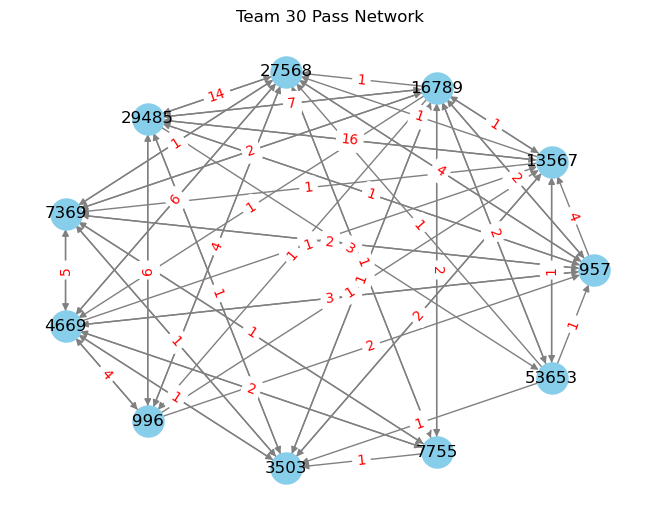

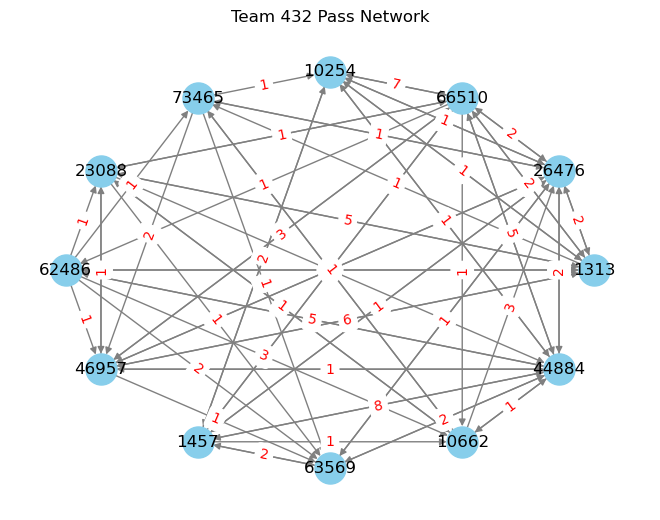

In [195]:
# draws a team's pass network
def draw_pass_network(pass_network, team_id):
    # decides layout for nodes
    DG = pass_network
    pos = nx.circular_layout(DG)
    
    # draws graph components
    nx.draw(DG, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
    
    # adds pass freq as edge weights
    edge_labels = nx.get_edge_attributes(DG, 'weight')
    
    # draws edge weights
    nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels, font_color='red')
    
    #plt.figure(figsize=(12, 10))
    
    # displays plot
    plt.title(f"Team {team_id} Pass Network")
    plt.axis('off') # Turn off the axis ticks
    plt.show()

#draw_pass_network(pass_network_dict['30'])
for team_id, team_network in pass_network_dict.items():
    draw_pass_network(pass_network_dict[team_id], team_id)

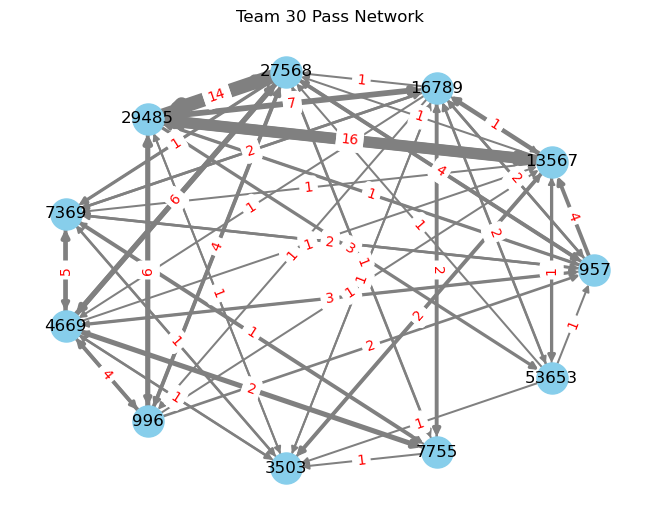

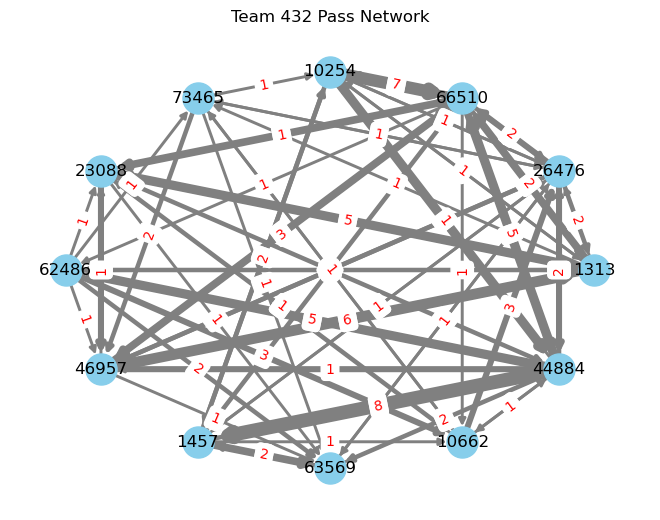

In [197]:
def draw_pass_network(pass_network, team_id):
    DG = pass_network
    pos = nx.circular_layout(DG)
    
    # extract edge weights for line thickness
    edges = DG.edges(data=True)
    weights = [d.get('weight', 1) for _, _, d in edges]
    
    # normalize weights to a reasonable visual range (1-10)
    max_w = max(weights) if weights else 1
    widths = [1 + 9 * (w / max_w) for w in weights]
    
    nx.draw(DG, pos, with_labels=True, node_color='skyblue', node_size=500,
            edge_color='gray', width=widths)
    
    edge_labels = nx.get_edge_attributes(DG, 'weight')
    nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title(f"Team {team_id} Pass Network")
    plt.axis('off')
    plt.show()

#draw_pass_network(pass_network_dict['30'])
for team_id, team_network in pass_network_dict.items():
    draw_pass_network(pass_network_dict[team_id], team_id)

In [271]:
# Define column types
categorical_cols = ['body_part_int', 'pass_type_int']
body_part_encoded = ['body_part_int_2', 'body_part_int_3']
pass_type_encoded = ['pass_type_int_1', 'pass_type_int_2', 'pass_type_int_3', 
                    'pass_type_int_4', 'pass_type_int_5', 'pass_type_int_6', 'pass_type_int_7']
continuous_cols = ['pass_time', 'pass_distance']
binary_cols = ['is_under_pressure_int']
target = 'success_int'

# 1. One-hot encode categorical variables
#df_encoded = filtered_events_df.to_dummies(columns=categorical_cols, drop_first=True)
df_encoded = filtered_events_df.to_dummies(columns=categorical_cols)
df_encoded
y = df_encoded[target].to_numpy()
#X = df_encoded.drop('success_int').to_numpy()
#X = df_encoded[continuous_cols + binary_cols + body_part_encoded + pass_type_encoded].to_numpy()
X = df_encoded[continuous_cols]
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = X
X = sm.add_constant(X)
print(X)
print(X.shape)
df_encoded

[[ 1.         -0.2294993  -0.55092498]
 [ 1.          1.82349341  2.05205583]
 [ 1.         -0.9204257  -0.51251733]
 ...
 [ 1.          0.13306265  0.80625684]
 [ 1.          1.33740878  0.75056796]
 [ 1.         -0.48466513 -0.09409458]]
(523, 3)


pass_time,pass_distance,body_part_int_1,body_part_int_2,body_part_int_3,pass_type_int_0,pass_type_int_1,pass_type_int_2,pass_type_int_3,pass_type_int_4,pass_type_int_5,pass_type_int_6,pass_type_int_7,is_under_pressure_int,success_int
f32,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,i64,i64
1.34e6,0.1486,1,0,0,1,0,0,0,0,0,0,0,0,1
3.135e6,0.536393,1,0,0,1,0,0,0,0,0,0,0,0,0
735900.0,0.154322,0,1,0,0,0,0,0,1,0,0,0,1,0
1.01e6,0.101486,1,0,0,1,0,0,0,0,0,0,0,1,1
715900.0,0.069004,1,0,0,1,0,0,0,0,0,0,0,0,1
1.1939e6,0.242486,1,0,0,0,0,0,0,0,0,0,1,1,0
1.281e6,0.186599,1,0,0,1,0,0,0,0,0,0,0,1,1
137000.0,0.053174,1,0,0,1,0,0,0,0,0,0,0,1,0
1.814e6,0.165579,1,0,0,1,0,0,0,0,0,0,0,0,1


In [277]:
# Define column types
categorical_cols = ['body_part_int', 'pass_type_int']
body_part_encoded = ['body_part_int_2', 'body_part_int_3']
pass_type_encoded = ['pass_type_int_1', 'pass_type_int_2', 'pass_type_int_3', 
                    'pass_type_int_4', 'pass_type_int_5', 'pass_type_int_6', 'pass_type_int_7']
continuous_cols = ['pass_time', 'pass_distance']
binary_cols = ['is_under_pressure_int']
target = 'success_int'

# 1. One-hot encode categorical variables
df_encoded = filtered_events_df.to_dummies(columns=categorical_cols)

y = df_encoded[target].to_numpy()

# 2. Scale only continuous columns
X_continuous = df_encoded[continuous_cols].to_numpy()
scaler = StandardScaler()
X_continuous = scaler.fit_transform(X_continuous)

# 3. Get binary/dummy columns (no scaling)
X_binary = df_encoded[binary_cols + body_part_encoded + pass_type_encoded].to_numpy()

# 4. Combine and add constant
X = np.hstack([X_continuous, X_binary])
X = sm.add_constant(X)

feature_names = continuous_cols + binary_cols + body_part_encoded + pass_type_encoded
print(X)

[[ 1.         -0.2294993  -0.55092498 ...  0.          0.
   0.        ]
 [ 1.          1.82349341  2.05205583 ...  0.          0.
   0.        ]
 [ 1.         -0.9204257  -0.51251733 ...  0.          0.
   0.        ]
 ...
 [ 1.          0.13306265  0.80625684 ...  0.          0.
   0.        ]
 [ 1.          1.33740878  0.75056796 ...  0.          0.
   0.        ]
 [ 1.         -0.48466513 -0.09409458 ...  0.          0.
   0.        ]]


In [283]:
import statsmodels.api as sm

# Fit logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit(method='bfgs', maxiter=1000)

# Print full summary with p-values, z-scores, conf intervals
print(result.summary(xname=['const'] + continuous_cols + binary_cols + body_part_encoded + pass_type_encoded))

Optimization terminated successfully.
         Current function value: 0.476118
         Iterations: 68
         Function evaluations: 69
         Gradient evaluations: 69
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  523
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                           10
Date:                Fri, 13 Feb 2026   Pseudo R-squ.:                  0.1749
Time:                        16:13:17   Log-Likelihood:                -249.01
converged:                       True   LL-Null:                       -301.80
Covariance Type:            nonrobust   LLR p-value:                 4.134e-18
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const           

C:\Users\Jerem\anaconda3\envs\soccer_env\lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [285]:
# Option B: Just use sklearn (handles this gracefully by default)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, penalty='l2')
model.fit(X, y)
for name, coef in zip(feature_names, model.coef_[0]):
    print(f"{name}: {coef:.4f}")

pass_time: -0.0006
pass_distance: 0.0393
is_under_pressure_int: 0.0899
body_part_int_2: -0.7929
body_part_int_3: -0.7396
pass_type_int_1: -0.6130
pass_type_int_2: -1.7115
pass_type_int_3: -0.6439
pass_type_int_4: -0.6130
pass_type_int_5: -0.7396
pass_type_int_6: -1.4140
pass_type_int_7: 0.4112


In [297]:
from sklearn.inspection import permutation_importance

X_no_const = X[:, 1:]  # drop first column
X_train, X_test, y_train, y_test = train_test_split(X_no_const, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
perm = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

for i in np.argsort(perm.importances_mean)[::-1]:
    print(f"{feature_names[i]}: {perm.importances_mean[i]:.4f} ± {perm.importances_std[i]:.4f}")

pass_type_int_7: 0.0705 ± 0.0171
is_under_pressure_int: 0.0340 ± 0.0178
pass_type_int_5: 0.0041 ± 0.0088
pass_type_int_4: 0.0029 ± 0.0056
body_part_int_2: 0.0029 ± 0.0056
pass_type_int_3: 0.0003 ± 0.0017
body_part_int_3: 0.0003 ± 0.0017
pass_type_int_1: 0.0000 ± 0.0000
pass_distance: 0.0000 ± 0.0000
pass_type_int_2: 0.0000 ± 0.0000
pass_time: 0.0000 ± 0.0000
pass_type_int_6: -0.0003 ± 0.0017


In [301]:
for name, coef in sorted(zip(feature_names, model.coef_[0]), key=lambda x: abs(x[1]), reverse=False):
    print(f"{name}: {coef:+.4f}")

pass_time: +0.0470
pass_distance: +0.0656
pass_type_int_6: +0.2634
body_part_int_3: -0.4501
pass_type_int_3: -0.4501
pass_type_int_2: -0.6281
is_under_pressure_int: -0.6743
body_part_int_2: -0.8160
pass_type_int_4: -0.8160
pass_type_int_5: -1.4855
pass_type_int_7: -1.5965
pass_type_int_1: -1.7513


In [87]:
# 2. Get feature matrix and target
feature_cols = [c for c in df_encoded.columns if c != target]
print(feature_cols)
X = df_encoded.select(feature_cols).to_numpy()
y = df_encoded.select(target).to_numpy().ravel()
print(X, y)
# 3. Identify which columns are continuous (need scaling)
continuous_indices = [
    df_encoded.select(feature_cols).columns.index(col) 
    for col in continuous_cols
]
print(continuous_indices)

['pass_time', 'pass_distance', 'body_part_int_2', 'body_part_int_3', 'pass_type_int_1', 'pass_type_int_2', 'pass_type_int_3', 'pass_type_int_4', 'pass_type_int_5', 'pass_type_int_6', 'pass_type_int_7', 'is_under_pressure_int']
[[1.34000000e+06 1.48600493e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.13500000e+06 5.36392816e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.35900000e+05 1.54322469e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [1.65700000e+06 3.50793566e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.71000000e+06 3.42497033e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.11690000e+06 2.16659129e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] [1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 

In [89]:
# 4. Scale continuous features only
scaler = StandardScaler()
X[:, continuous_indices] = scaler.fit_transform(X[:, continuous_indices])

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [91]:
import polars as pl
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split







# 6. Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 7. Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7810
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        28
           1       0.80      0.94      0.86        77

    accuracy                           0.78       105
   macro avg       0.73      0.65      0.66       105
weighted avg       0.76      0.78      0.76       105

